In [ ]:
!git clone https://github.com/dellacortelab/milcdock.git

# *MAKE SURE TO CHANGE RUNTIME TYPE TO GPU*

# Load model and data

In [ ]:
import torch

from milcdock.milcdock.model import get_saved_model
from milcdock.milcdock.dataset import get_dataloader

model_path = '/content/milcdock/results/saved_models/ensemble_mlp/dude-lit-pcba'
# model_path = '/content/milcdock/results/saved_models/mlp/dude-lit-pcba.pt'
dataset_path = '/content/milcdock/data/3_ml_inputs/test_data.pkl'

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataloader = get_dataloader(dataset_path=dataset_path)

# Assign scores to each ligand

In [ ]:
from milcdock.milcdock.evaluate import evaluate

scores = evaluate(model_save_path=model_path, dataloader=dataloader, batch_size=32, device=device)

# Evaluate by AUC, BEDROC, and EF metrics

In [7]:
print("AUCs: ", scores['all_t_auc'])
print("BEDROCs: ", scores['all_t_bedroc'])
print("EFs: ", scores['all_t_ef'])

AUCs:  {'fgfr1': 0.5526949844012479, 'glcm': 0.9057305351606564, 'igf1r': 0.8712000828910124, 'reni': 0.9491423405777996}
BEDROCs:  {'fgfr1': 0.18390599387174325, 'glcm': 0.6428981992808382, 'igf1r': 0.6260859769230188, 'reni': 0.896155506640536}
EFs:  {'fgfr1': 0.3333333333333333, 'glcm': 0.6749999999999999, 'igf1r': 0.5729166666666666, 'reni': 0.9178082191780821}


# Visualize scoring of active/inactive ligands

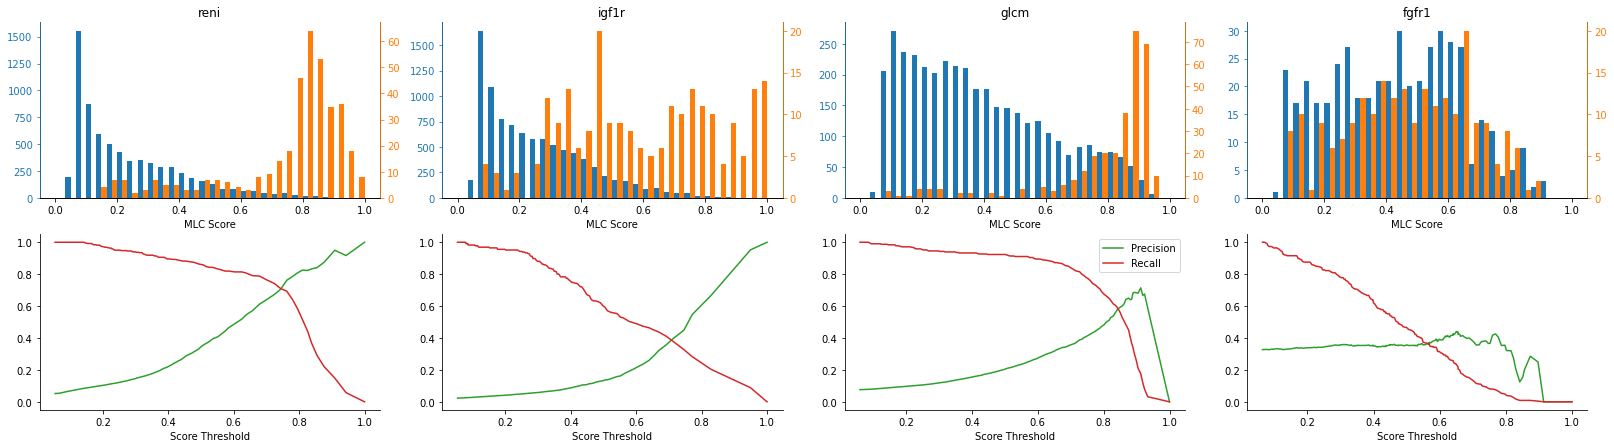

In [8]:
from milcdock.milcdock.figures import make_hist

make_hist(scores['all_preds'], scores['all_labels'], dataloader.dataset.df['receptor'])